In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

%matplotlib inline

directory = "/Users/nassimgharbi/Documents/Udacity-Data-Science_Nano/Week-1_Intro_to_Data_Science/Data_sets/Airbnb/Seattle/"
df = pd.read_csv(directory+"listings.csv")
df1 = pd.read_csv(directory+"reviews.csv")
df2 = pd.read_csv(directory+"calendar.csv")

pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)
df.head()

,id,listing_url,scrape_id,last_scraped,name,...,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,...,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,...,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,...,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,...,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,...,strict,f,f,1,0.89


In [25]:
#transforming all money-related values 
data = [df,df1,df2]
    
    
def trans_money(df_):
    
    """
    The function transforms strings indicating prices to floats. 

    Parameters: 
        df (Datframe): The dataframe to exceute the operation on.

    Returns: 
        df: Cleansed dataframe with float values.


    """

    for col in df_.select_dtypes(include="object").columns:
        if np.all(df_[col].dropna().str.startswith("$")):
            df_[col] = df_[col].str.replace('\$|\,',"").astype("float")
            
    return df


trans_money(df).price
print(trans_money.__doc__)


    The function transforms strings indicating prices to floats. 

    Parameters: 
        df (Datframe): The dataframe to exceute operation on.

    Returns: 
        df: Cleansed dataframe with float values.


    


In [3]:
df.shape

(3818, 92)

In [4]:
#check for missing values

df_nan = pd.DataFrame(columns=["column", "%_nan"])
for col in df.columns:
    df_nan = df_nan.append({'column': col, "%_nan":df[col].isna().sum()/df.shape[0]}, ignore_index=True)

display(df_nan[df_nan["%_nan"] != 0].sort_values(by="%_nan", ascending=False) )  


#drop columns w/ > .5 missing values

columns_to_drop = [col for col in df.columns if df[col].isna().sum()/df.shape[0] >.5 ]
df = df.drop(columns=columns_to_drop)



,column,%_nan
84,license,1.000000
56,square_feet,0.974594
59,monthly_price,0.602672
60,security_deposit,0.511262
58,weekly_price,0.473808
...,...,...
19,host_since,0.000524
18,host_name,0.000524
33,host_identity_verified,0.000524
53,beds,0.000262


In [5]:
df.shape

(3818, 88)

In [6]:
num_vars = df.select_dtypes(include=("float","int"))
cat_vars = df.select_dtypes(include=("object"))

In [7]:

num_vars.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,...,3167.000000,3163.000000,3162.000000,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,...,9.809599,9.608916,9.452245,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,...,0.568211,0.629053,0.750259,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,...,2.000000,4.000000,2.000000,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,...,10.000000,9.000000,9.000000,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,...,10.000000,10.000000,10.000000,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,...,10.000000,10.000000,10.000000,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,...,10.000000,10.000000,10.000000,37.000000,12.150000


<AxesSubplot:>

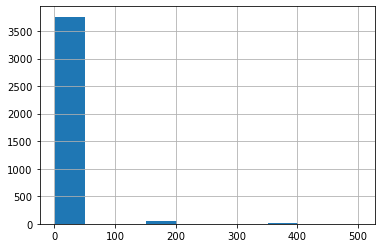

In [8]:
num_vars.host_listings_count.hist()

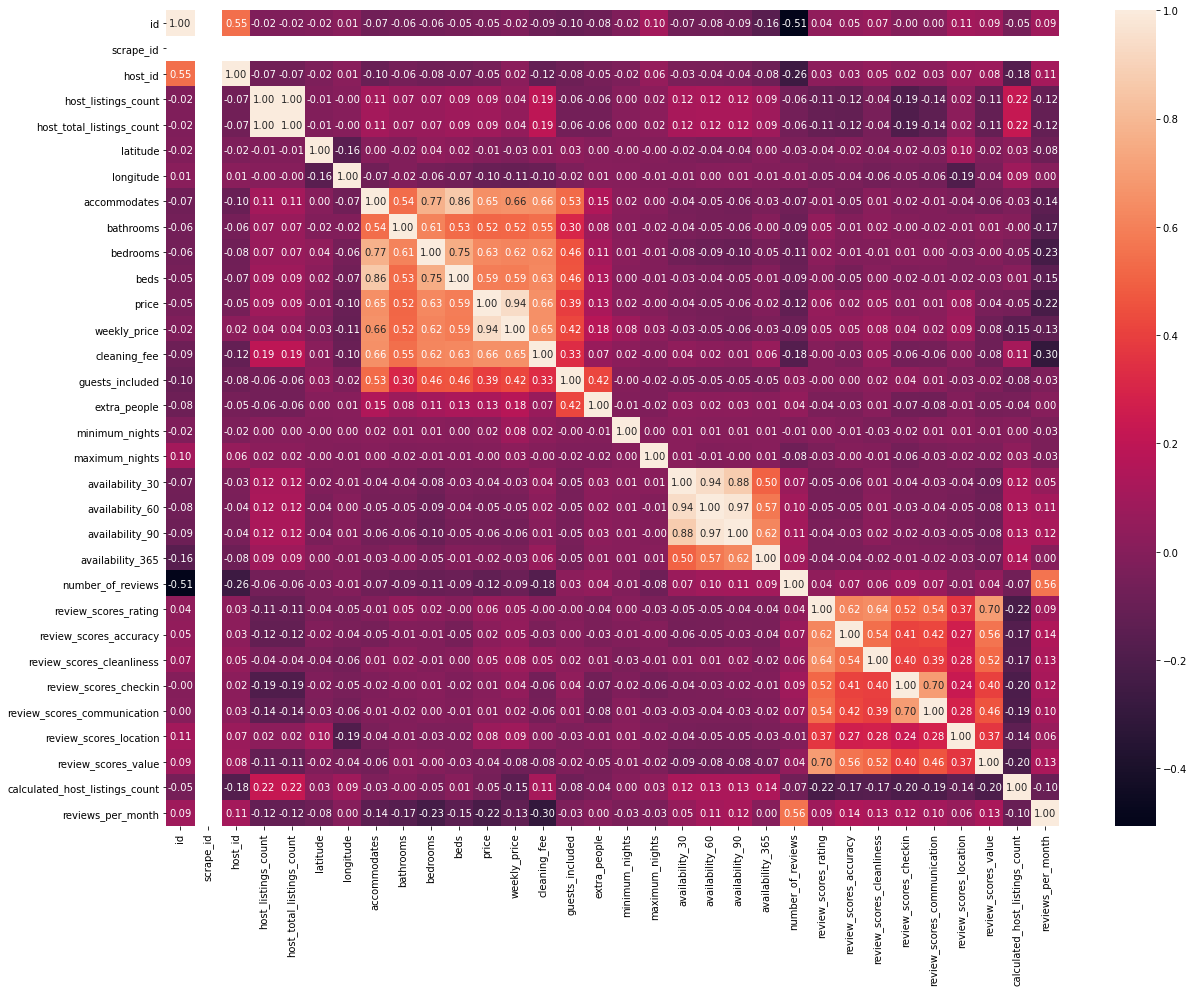

In [9]:
plt.subplots(figsize=(20,15))
sns.heatmap(num_vars.corr(), annot=True, fmt=".2f");

# Linear Regression w/ numeric values


In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

#mssing values dropped instead of imputed given their low percentage
num_vars_1 = df.loc[:,["price","accommodates", "bathrooms", "bedrooms", "beds", "cleaning_fee","guests_included"]].dropna(axis=0)
#num_vars_1 = num_vars_1.dropna(subset=["price"], axis=0)


X = num_vars_1.drop("price", axis=1)
y = num_vars_1["price"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

# Instantiate
lm_model = LinearRegression(normalize=True)

#Fit
lm_model.fit(X_train, y_train)
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 

"The r-squared score for the olq regression model using only quantitative variables was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for the olq regression model using only quantitative variables was 0.6115732779901999 on 832 values.'

In [11]:
#ridge regression
from sklearn import linear_model

# Instantiate
reg = linear_model.Ridge(alpha=.5, random_state=43, normalize=True)
#Fit
reg.fit(X_train, y_train)

#Predict and score the model
y_test_preds_1 = reg.predict(X_test) 

#Calculate feature coefficient
coef_ridge = reg.coef_
coef_ = reg.coef_ * X_test + reg.intercept_

r2_score(y_test, y_test_preds_1)
print("The r-squared score for the ridge-regression model using only quantitative variables was {} on {} values.".format(r2_score(y_test, y_test_preds_1), len(y_test)))
display(pd.DataFrame({"features":X_train.columns,"coefficient":coef_ridge}))



The r-squared score for the ridge-regression model using only quantitative variables was 0.5843590811148613 on 832 values.


,features,coefficient
0,accommodates,6.343662
1,bathrooms,24.039136
2,bedrooms,14.370993
3,beds,6.750155
4,cleaning_fee,0.382459
5,guests_included,5.229481


In [12]:
#lasso regression

# Instantiate
reg = linear_model.Lasso(alpha=0.5, normalize=True)

# Fit
reg.fit(X_train, y_train)

# Predict & score
y_test_preds_2 = reg.predict(X_test) 
r2_score(y_test, y_test_preds_2)
"The r-squared score for the lasso-regression model using only quantitative variables was {} on {} values.".format(r2_score(y_test, y_test_preds_2), len(y_test))

'The r-squared score for the lasso-regression model using only quantitative variables was 0.5273759107262408 on 832 values.'

# Linear Regression w/ categorical values

In [13]:
#prepare categorical data and get dummies
cat_vars = df.select_dtypes(include=("object"))
columns_to_keep = ['host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_neighbourhood', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'country_code',
       'is_location_exact', 'property_type', 'room_type', 'bed_type',
       'has_availability', 'requires_license', 'instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification']

#mssing values dropped,imputing not practical as values has specific nature
cat_vars = cat_vars.dropna().loc[:,columns_to_keep]

#creating dummy variables to test for correlation
cat_vars_cleaned = pd.DataFrame()
for col in cat_vars.columns:
    cat_vars_cleaned = pd.concat([cat_vars_cleaned, pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=False)], axis = 1)

    
#create X and y
X = cat_vars_cleaned
y = df["price"]

#create test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=45) 

# Instantiate
lm_model = LinearRegression(normalize=True)

#Fit
lm_model.fit(X_train, y_train)
        
#Predict and score the model
y_test_preds_cat = lm_model.predict(X_test) 

"The r-squared score for the standard regression model using only categorical variables was {} on {} values.".format(r2_score(y_test, y_test_preds_cat), len(y_test))

'The r-squared score for the standard regression model using only categorical variables was -3.526367876488724e+27 on 1146 values.'

# Applying model on Boston data set

In [14]:
directory = "/Users/nassimgharbi/Documents/Udacity-Data-Science_Nano/Week-1_Intro_to_Data_Science/Data_sets/Airbnb/Boston/"
df_boston = pd.read_csv(directory+"listings.csv")
df_boston = trans_money(df_boston)
df_boston1 = pd.read_csv(directory+"reviews.csv")
df_boston2 = pd.read_csv(directory+"calendar.csv")

pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)
df.head()

,id,listing_url,scrape_id,last_scraped,name,...,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,...,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,...,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,...,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,...,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,...,strict,f,f,1,0.89


In [15]:
#drop columns with nan above threshold
columns_to_drop = [col for col in df_boston.columns if df_boston[col].isna().sum()/df_boston.shape[0] >.5 ]
df_boston = df_boston.drop(columns=columns_to_drop)

In [21]:
#mssing values dropped as amount of data sufficient
num_vars_boston = df_boston.loc[:,["price","accommodates", "bathrooms", "bedrooms", "beds","cleaning_fee", "guests_included"]].dropna(axis=0)

#random sample of boston data set with same X and y
X_boston = num_vars_boston.sample(n=832,  random_state=4).drop("price", axis=1)
y_boston = num_vars_boston.sample(n=832,  random_state=4).price

X = num_vars_1.drop("price", axis=1)
y = num_vars_1["price"]

#create test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

# Instantiate
lm_model = LinearRegression(normalize=True)

#Fit
lm_model.fit(X_train, y_train)
        
#Predict and score the model
y_test_preds = lm_model.predict(X_boston) 

"The r-squared score for the olq regression model using seattle model to precict boston prices was {} on {} values.".format(r2_score(y_boston, y_test_preds), len(y_test))

'The r-squared score for the olq regression model using seattle model to precict boston prices was 0.590832001158006 on 832 values.'